Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 


### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.

## 06 - Beginning Data Scaling

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.


In [1]:
# Let's import some libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Let's import our dataset
df_conn = pd.read_csv(r'df_conn_cleaned.csv', index_col=0)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0
1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4430183,192.168.0.21,55757,192.168.0.4,9200,0.000051,0,0,1,52,1,40
4430184,192.168.0.4,37236,192.168.0.4,9200,0.000023,0,0,0,0,1,40
4430185,192.168.0.4,37244,192.168.0.4,9200,0.000005,0,0,0,0,1,40
4430186,192.168.0.4,37246,192.168.0.4,9200,0.000005,0,0,0,0,1,40


This file represents Zeek (formerly Bro) connection log - conn.log`. <br>
Zeek is a framework used for Network Security Monitoring.  <br>
This entire series is based on using Zeek's data.  <br>
The majority of the notebooks use the conn.log <br>
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html


In [ ]:
# Dropping the IPs and source port columns
df_conn = df_conn.drop(columns=['id.orig_h', 'id.orig_p', 'id.resp_h'])
df_conn.head(10)

At this point, you may think its a good idea to go ahead with building your model. <br>
My recommendation is you don't.  <br>
If you will be building models using Gradient Descent (think Linear Regression or Neural Networks)  <br>
or distance based algorithms (think unsupervised learning, i.e. clustering, nearest neighbors, etc.),  <br>
it is likely this data should be scaled first.

Let's get the basics of scaling out of the way.

From a simple view <br>
Let's say we are using feature "id.resp_p" which represents the responder ports.  <br>
When working with TCP and UDP ports, we can have values from 0-65535, inclusive  <br>

To learn more about TCP/UDP ports see:  <br>
https://en.wikipedia.org/wiki/List_of_TCP_and_UDP_port_numbers

In [3]:
# Let's say we take a few of the common port numbers and 2 not so common numbers to make a feature
# If you are wondering 0 and 65535 are the ones I'm considering not so common
# https://www.stationx.net/common-ports-cheat-sheet/
# The .T is for transposition
# Transposing was discussed in the following notebooks:
#   01 - Beginning Numpy
#   02 - Beginning Tensorflow
#   03 - Beginning PyTorch
# Notice I add the dtype, int as ports are integers
common_ports = np.array([0, 80, 443, 445, 995, 65535], dtype=int, ndmin=2).T
common_ports

array([[    0],
       [   80],
       [  443],
       [  445],
       [  995],
       [65535]])

In [4]:
# Now if we look at the "duration" column in our above dataframe, 
# most of our values are very small. 
# Realistically, this feature is time in seconds
# Let's create a sample feature for duration to match common_ports above
# Rather than transpose like I did above, I just made it 2 dimensional
# Notice I have the data type as float as the duration is normally float values
duration = np.array([[1], [1], [2], [1], [2], [1]], dtype=np.float32)
duration


array([[1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.]], dtype=float32)

In [5]:
# Stacking the two columns to create a dataset
# We also learned about using numpy, tensorflow and pytorch to stack
#   01 - Beginning Numpy
#   02 - Beginning Tensorflow
#   03 - Beginning PyTorch
np.set_printoptions(suppress=True)
np.hstack((common_ports, duration))

array([[    0.,     1.],
       [   80.,     1.],
       [  443.,     2.],
       [  445.,     1.],
       [  995.,     2.],
       [65535.,     1.]])

In [6]:
# As can be seen above, the two values are on different scales.
# You may also notice that the dataset was changed to float without me changing the dtype=np.float32 for duration
# We can confirm these scales, by looking at the peak to peak. 
# Peak to Peak shows the difference between the smallest and largest port is 65535
# and the difference between the smallest and largest duration is 1
np.ptp(common_ports), np.ptp(duration)

(65535, 1.0)

In [7]:
# With the basic understanding of why we need to have everything on one scale
# let's find the easiest way to scale these values between 0 and 1.
# Take each value and divide it by the max value
# for example, if we take port 0/65535 we get 0
0 / 65535

0.0

In [8]:
# Similarly, if we divide the largest value 65535/65535 we get 1
65535/65535

1.0

In [10]:
# This as you can see, pushes all values between 0 and 65535 to be between 0 and 1
# For example, if we take 22, 443, 4444
22/65535, 443/65535, 4444/65535,   

(0.0003356984817273213, 0.006759746700236515, 0.0678110933089189)

In [11]:
# Using our intuition above to scale the common ports feature
# We take each port (i) and divide it by the max (np.max) port value 
common_ports_scaled = np.array([ i/np.max(common_ports) for i in common_ports ], ndmin=2, dtype=np.float32)
common_ports_scaled

array([[0.        ],
       [0.00122072],
       [0.00675975],
       [0.00679026],
       [0.01518273],
       [1.        ]], dtype=float32)

In [12]:
# Doing the same for the duration feature
# We take each duration (i) and divide it by the max (np.max) duration value 
duration_scaled = np.array([ i/np.max(duration) for i in duration ], ndmin=2, dtype=np.float32)
duration_scaled

array([[0.5],
       [0.5],
       [1. ],
       [0.5],
       [1. ],
       [0.5]], dtype=float32)

In [13]:
# Suppressing scientific notation
np.set_printoptions(suppress=True, precision=4)

# Stacking the two matrices again.
# As we can see now, both features (columns) are on the same scale
# The scale is 0 to 1
# Hence the smallest value to be had is 0 and the largest is 1. 
# We can see from the last sample below, 1s in both columns
# This probably is the simplest of normalizations
# Normalization is considered a per-sample transformation rather than a per-feature transformation
np.hstack((common_ports_scaled, duration_scaled))

array([[0.    , 0.5   ],
       [0.0012, 0.5   ],
       [0.0068, 1.    ],
       [0.0068, 0.5   ],
       [0.0152, 1.    ],
       [1.    , 0.5   ]], dtype=float32)

Let's now leverage normalization similar to what is done in packages such as sklearn  <br>
Keep in mind, there are many strategies available for scaling your data.  <br>
You will have to make a decision on choice of scaling, based on the problem  <br>
you are attempting to solve  <br>
Do keep in mind also, scalers can be linear or nonlinear.  <br>

Let's start with MinMaxScaler  <br>
MinMax transforms the feature between 0 and 1  <br>
Similar to what we did above but not the same way <br>
This scaler is sensitive to outliers

In [14]:
# The formula for MinMaxScaler
# x_scaled = x - x.min() / x.max - x.min()
# Let's write a function to perform this transformation
def my_minmax_scaler(x: np.array) -> np.ndarray:
    ''' Returns the a numpy array scaled between 0 and 1 
            Parameter: 
                x (numpy array): A numpy array
            
            Returns:
                A numpy ndarray
    '''
    return np.array([ (i - np.min(x) ) / (np.max(x) - np.min(x)) for i in x ])

In [15]:
# Reviewing the docstring
print(my_minmax_scaler.__doc__)

 Returns the a numpy array scaled between 0 and 1 
            Parameter: 
                x (numpy array): A numpy array
            
            Returns:
                A numpy ndarray
    


In [16]:
# Run our scaler against the common ports
my_minmax_scaler(common_ports)

array([[0.    ],
       [0.0012],
       [0.0068],
       [0.0068],
       [0.0152],
       [1.    ]])

In [17]:
# Test our scaler against skleran MinMax Scaler
# First import the necessary library
# Referemce:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


In [18]:
# Run sklearn's MinMax scaler against our data
# Once completed, we see the same results as our manual process
MinMaxScaler().fit_transform(common_ports)

array([[0.    ],
       [0.0012],
       [0.0068],
       [0.0068],
       [0.0152],
       [1.    ]])

Let's do the same thing with our standard scaler <br>
In this case we want to have a mean of 0 and standard deviation of 1 <br>
the formula is x - x.mean() / x.std <br>
Keep in mind, this works best if our data is normally distributed  <br>
If the data is not normally distributed, standard scaler may not be the best option  <br>
Additionally, you may hear the term normalize or standardize your data used loosely  <br>
The better term maybe to say scale your data by choosing a scaling strategy, either via normalization or standardization.  <br>
Basically normalization and standardization are two different things.

In [19]:
# Define our own standard scaler function
def my_standard_scaler(x: np.array) -> np.ndarray:
    ''' Returns a numpy array standardized with a mean of  0 and standard deviation of 1 
            Parameter: 
                x (numpy array): A numpy array
            
            Returns:
                A numpy ndarray    
    '''
    return np.array([ (i - np.mean(x)) / ( np.std(x)) for i in x ])

In [20]:
# Test our standard scaler function against the common ports
my_standard_scaler(common_ports)

array([[-0.4633],
       [-0.46  ],
       [-0.4451],
       [-0.445 ],
       [-0.4224],
       [ 2.2359]])

In [21]:
# Validating our results, using skleran's StandardScaler
# Reference:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [22]:
# standard scaler validates our function works.
StandardScaler(with_mean=True, with_std=True).fit_transform(common_ports)

array([[-0.4633],
       [-0.46  ],
       [-0.4451],
       [-0.445 ],
       [-0.4224],
       [ 2.2359]])

In [29]:
# Leveraging Max Absolute Scaler, where each value is scaled by its maximum absolute value
# This does not shift or center the data
# This scaling is x_scaled = x / max(|x|)
# This is similar to what we did before x / max(x), difference between now we are looking at max(|x|) absolute value

def my_maxabs_scaler(x: np.array) -> np.ndarray:
    ''' Returns a numpy array that is scaled by the absolute of the max value 
                Parameter: 
                x (numpy array): A numpy array
            
            Returns:
                A numpy ndarray
    '''
    return np.array([ i / np.max(abs(x)) for i in x ])

In [30]:
# How does the absolute value come into play?
x_neg , y_pos = -10, -20

# The absolute value is the positive version of these numbers
# Hence the reason I mention above about the similarity to what was done before
np.abs(x_neg), abs(y_pos)

(10, 20)

In [31]:
# Use our Max Absolute Scaler to scale the data
my_maxabs_scaler(common_ports)

array([[0.    ],
       [0.0012],
       [0.0068],
       [0.0068],
       [0.0152],
       [1.    ]])

In [32]:
# Validating our function works as expected
# by leveraging sklearn's MaxAbsScaler
# Reference:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html
from sklearn.preprocessing import MaxAbsScaler

In [33]:
# Once again, validating our function by comparing it with sklearn's MaxAbsScaler
MaxAbsScaler().fit_transform(common_ports)

array([[0.    ],
       [0.0012],
       [0.0068],
       [0.0068],
       [0.0152],
       [1.    ]])

One more!  <br>
Let's look at RobustScaler <br>
This methods uses statistics that are robust to outliers <br>
It scales the data according to the quantile range <br>
References: <br>
https://aihints.com/how-to-find-interquartile-range-in-python-using-numpy/

https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

In [34]:
# The formula for Robust Scaler
# x_scale = xi - x.median() / x_75th_percentile - x_25th_percentile

def my_robust_scaler(x: np.array) -> np.ndarray:
    ''' Returns a numpy array based on robust scaler 
            Parameter: 
                x (numpy array): A numpy array
            
            Returns:
                A numpy ndarray    
    '''
    return np.array([ (i - np.median(x) ) / ( np.percentile(a=x, q=75) - np.percentile(a=x, q=25) ) for i in x ])

In [35]:
# Test our Robust Scaler
my_robust_scaler(common_ports)

array([[-0.6465],
       [-0.53  ],
       [-0.0015],
       [ 0.0015],
       [ 0.8023],
       [94.7812]])

In [36]:
# Validating our function works as expected
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
from sklearn.preprocessing import RobustScaler

In [37]:
# Compare our scaler
RobustScaler().fit_transform(common_ports)

array([[-0.6465],
       [-0.53  ],
       [-0.0015],
       [ 0.0015],
       [ 0.8023],
       [94.7812]])

Awesome, we have a better understanding now of how to create our own scalers, use them against our data, then validate against sklearn's built in functions.  <br>
With that understanding, let's scale our data using these different scalers built into sklearn.  <br>
While it is nice that we were able to build our own scalers, we are better off taking advantage of the existing libraries

In [38]:
# Let's review the first 10 records from our dataset
df_conn.head(n=10)

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0
1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0
5,192.168.0.10,52824,89.187.183.77,8888,0.053276,208,976,6,528,6,1296
6,192.168.0.10,52826,89.187.183.77,8888,0.383646,227,692369,202,10739,117,240893
7,192.168.0.10,52828,89.187.183.77,8888,0.054294,208,977,6,528,6,1297
8,192.168.0.10,52830,89.187.183.77,8888,0.424980,227,791633,176,9387,174,367737
9,192.168.0.10,52832,89.187.183.77,8888,0.272567,227,406607,171,9127,71,169939


In [40]:
# Let's drop the source and destination IP addresses
df_conn = df_conn.drop(columns=['id.orig_h', 'id.resp_h'], inplace=False)
df_conn.head(10)

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,27762,58552,0.000000,0,0,0,0,0,0
1,27761,48798,0.000000,0,0,0,0,0,0
2,27761,48804,0.000000,0,0,0,0,0,0
3,27762,58568,0.000000,0,0,0,0,0,0
4,48786,27761,0.000000,0,0,0,0,0,0
5,52824,8888,0.053276,208,976,6,528,6,1296
6,52826,8888,0.383646,227,692369,202,10739,117,240893
7,52828,8888,0.054294,208,977,6,528,6,1297
8,52830,8888,0.424980,227,791633,176,9387,174,367737
9,52832,8888,0.272567,227,406607,171,9127,71,169939


In [41]:
# As we can see our Zeek conn.log data is on different scales
# In machine learning you fit and transform on the training data. 
# However, you only transform the test data
# We don't have a test dataset at this time but when we build our models
# we will see this in practice
# Applying MinMax Scaling to our dataset
df_conn_minmax = MinMaxScaler().fit_transform(df_conn)
df_conn_minmax

array([[0.4236, 0.9108, 0.    , ..., 0.    , 0.    , 0.    ],
       [0.4236, 0.7591, 0.    , ..., 0.    , 0.    , 0.    ],
       [0.4236, 0.7592, 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.5683, 0.1431, 0.    , ..., 0.    , 0.    , 0.    ],
       [0.5683, 0.1431, 0.    , ..., 0.    , 0.    , 0.    ],
       [0.5685, 0.1431, 0.    , ..., 0.    , 0.    , 0.    ]])

In [42]:
# To confirm our data has been scaled, let's first look at the statistics
# First, I take the scaled numpy array above and turn it into a dataframe
# Next, I described the dataframe, then transpose it
# Once transposed, because the values are in scientific notation, I then round it to 4 decimal places
# We now have a better view of the scaled data
# We can see the largest value is 1 and the smallest is 0. 
# This means, the mean std, 25, 50 and 75 percentile are all between 0 and 1
np.round(pd.DataFrame(df_conn_minmax).describe().T,4)

,count,mean,std,min,25%,50%,75%,max
0,4430183.0,0.6375,0.1009,0.0,0.6173,0.6282,0.6706,1.0
1,4430183.0,0.1523,0.0957,0.0,0.1431,0.1431,0.1431,1.0
2,4430183.0,0.0000,0.0013,0.0,0.0000,0.0000,0.0000,1.0
3,4430183.0,0.0000,0.0005,0.0,0.0000,0.0000,0.0000,1.0
4,4430183.0,0.0000,0.0016,0.0,0.0000,0.0000,0.0000,1.0
5,4430183.0,0.0000,0.0006,0.0,0.0000,0.0000,0.0000,1.0
6,4430183.0,0.0000,0.0005,0.0,0.0000,0.0000,0.0000,1.0
7,4430183.0,0.0000,0.0008,0.0,0.0000,0.0000,0.0000,1.0
8,4430183.0,0.0000,0.0009,0.0,0.0000,0.0000,0.0000,1.0


In [43]:
# Getting visual with the scaled data
# Create a function to do view the scaled vs unscaled data, 
# This makes our lives easier, allowing us to see what the transformation looks like
# Who wants to change these values below constantly?!
# I do not! Setting up a function to help with the heavy lifting

def plot_unscaled_vs_scaled(unscaled_data: np.array, scaled_data: np.array, title='') -> None:
    ''' Plots subplots of normal vs scaled data 
            Parameter: 
                unscaled_data (numpy array): A numpy array
                scaled_data (numpy array): A numpy array
                title (string): A String

            Returns:
                None       
    '''
    plt.style.use('ggplot')
    fjg, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,10), sharex=False, sharey=False, squeeze=True)
    plt.suptitle(title)
    ax[0][0].hist(unscaled_data)
    ax[0][0].set_title('Unscaled data - dataset', fontsize=10)
    ax[0][1].hist(scaled_data)
    ax[0][1].set_title('Scaled data - dataset', fontsize=10)

    ax[1][0].set_title('Unscaled data - orig and resp bytes', fontsize=10)
    ax[1][0].scatter(x=unscaled_data['orig_bytes'], y=unscaled_data['resp_bytes'])
    ax[1][1].set_title('Scaled data - orig and resp bytes', fontsize=10)
    ax[1][1].scatter(x=scaled_data[:, 2], y=scaled_data[:, 3])

    ax[2][0].set_title('Unscaled data - orig_pkts vs resp_pkts', fontsize=10)
    ax[2][0].scatter(x=unscaled_data['orig_pkts'], y=unscaled_data['resp_pkts'])
    ax[2][1].set_title('Scaled data - orig_pkts vs resp_pkts', fontsize=10)
    ax[2][1].scatter(x=scaled_data[:, 4], y=scaled_data[:, 6])

    ax[3][0].set_title('Scaled data - orig_ip_bytes vs resp_ip_bytes', fontsize=10)
    ax[3][0].scatter(x=unscaled_data['orig_ip_bytes'], y=unscaled_data['resp_ip_bytes'])
    ax[3][1].set_title('Scaled data', fontsize=10)
    ax[3][1].scatter(x=scaled_data[:, 5], y=scaled_data[:, 7])

    plt.tight_layout()
    plt.show()
    

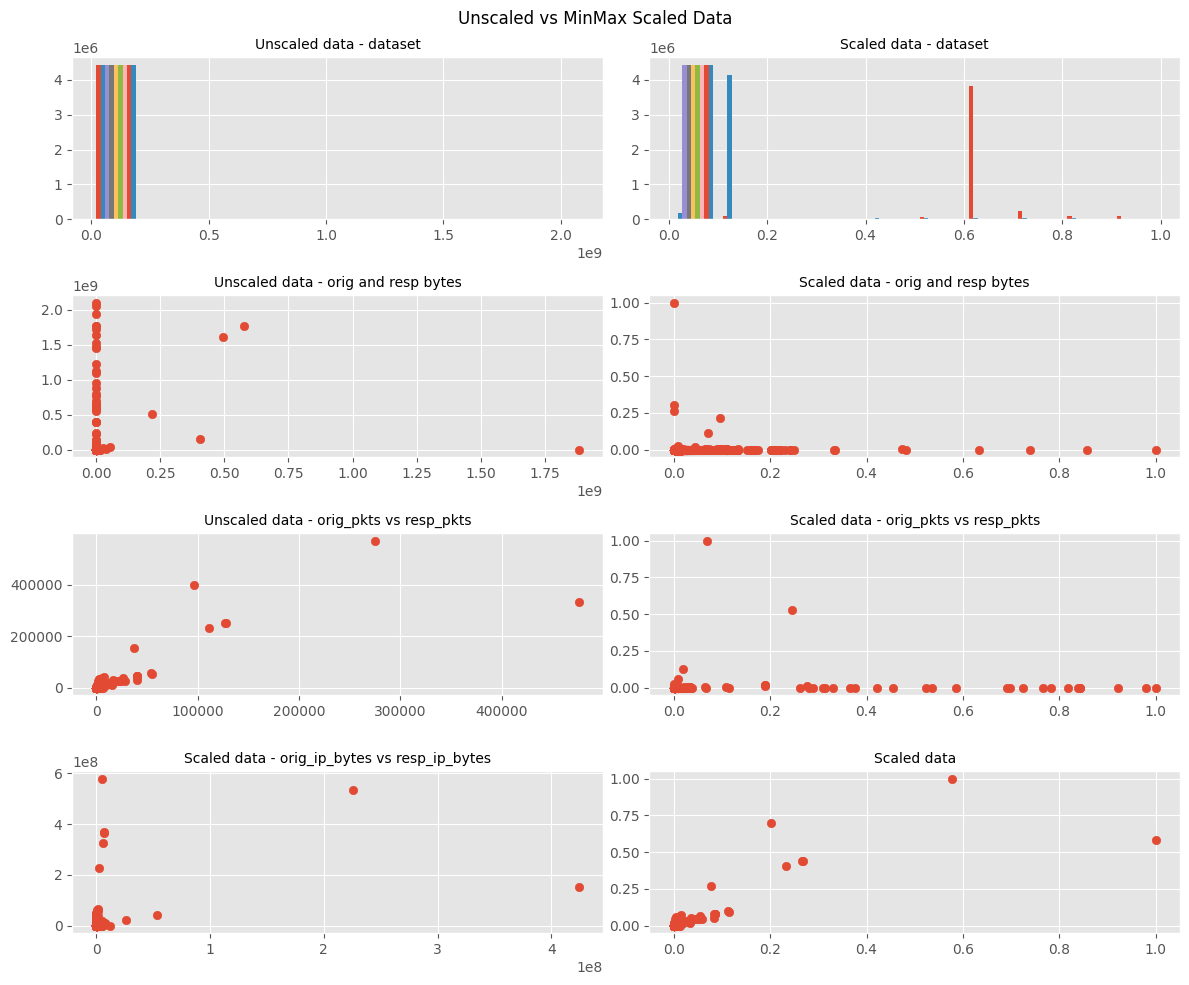

In [44]:
# With our function developed, plot the normal data vs the MinMax scaled data.
# As we see below, while the data has been scaled, between 0 and 
plot_unscaled_vs_scaled(unscaled_data=df_conn, scaled_data=df_conn_minmax, \
                        title='Unscaled vs MinMax Scaled Data')

In [45]:
# Leveraging Standard Scaler
# The values returned in a numpy array
df_conn_std_scaled = StandardScaler(with_mean=True, with_std=True).fit_transform(df_conn)
df_conn_std_scaled

array([[-2.1205,  7.9239, -0.0196, ..., -0.0014, -0.0055, -0.0071],
       [-2.1206,  6.3388, -0.0196, ..., -0.0014, -0.0055, -0.0071],
       [-2.1206,  6.3398, -0.0196, ..., -0.0014, -0.0055, -0.0071],
       ...,
       [-0.6862, -0.0962, -0.0196, ..., -0.0014, -0.0032, -0.007 ],
       [-0.6859, -0.0962, -0.0196, ..., -0.0014, -0.0032, -0.007 ],
       [-0.6847, -0.0962, -0.0196, ..., -0.0014, -0.0032, -0.007 ]])

In [46]:
# Looking at the statistics before plotting
# Rather than transpose, let's look at the dataframe's statistics in its normal form
# Let's round up to 3 decimal places this time
np.round(pd.DataFrame(df_conn_std_scaled).describe(), 3)

,0,1,2,3,4,5,6,7,8
count,4430183.000,4430183.000,4430183.000,4430183.000,4430183.000,4430183.000,4430183.000,4430183.000,4430183.000
mean,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-6.320,-1.591,-0.020,-0.001,-0.004,-0.006,-0.001,-0.006,-0.007
25%,-0.201,-0.096,-0.020,-0.001,-0.004,-0.006,-0.001,-0.006,-0.007
50%,-0.092,-0.096,-0.020,-0.001,-0.004,-0.006,-0.001,-0.006,-0.007
75%,0.327,-0.096,-0.020,-0.001,-0.004,-0.006,-0.001,-0.006,-0.007
max,3.593,8.856,795.211,1902.052,643.224,1625.552,1840.866,1309.378,1141.691


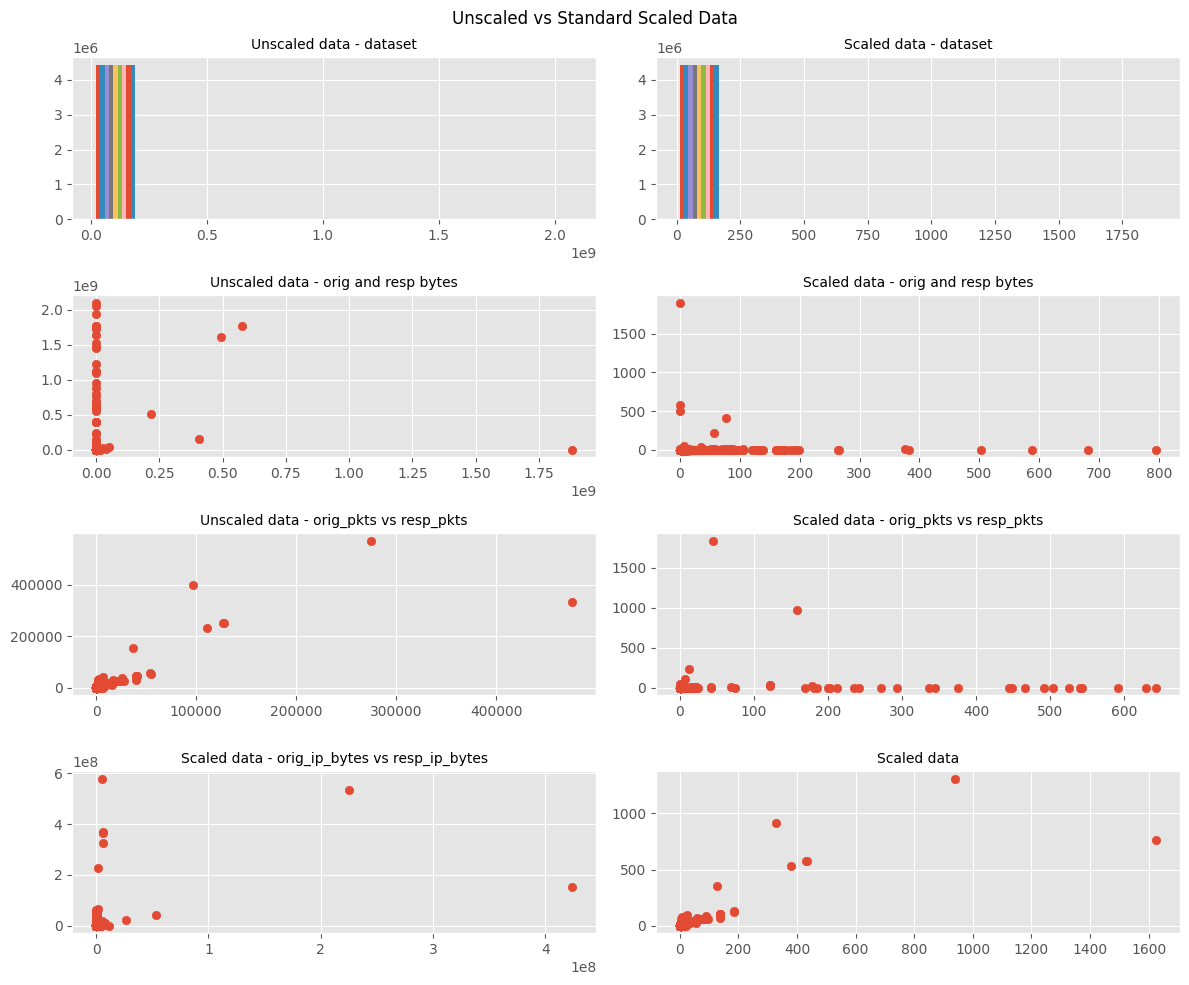

In [47]:
# Plotting the standard scaled data vs the unscaled data
plot_unscaled_vs_scaled(unscaled_data=df_conn, scaled_data=df_conn_std_scaled, \
                        title='Unscaled vs Standard Scaled Data')

In [48]:
# Looking at MaxAbsScaler
df_conn_max_abs_scaled = MaxAbsScaler().fit_transform(df_conn)
df_conn_max_abs_scaled

array([[0.4236, 0.9108, 0.    , ..., 0.    , 0.    , 0.    ],
       [0.4236, 0.7591, 0.    , ..., 0.    , 0.    , 0.    ],
       [0.4236, 0.7592, 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.5683, 0.1431, 0.    , ..., 0.    , 0.    , 0.    ],
       [0.5683, 0.1431, 0.    , ..., 0.    , 0.    , 0.    ],
       [0.5685, 0.1431, 0.    , ..., 0.    , 0.    , 0.    ]])

In [49]:
# Looking at the statistics 
np.round(pd.DataFrame(df_conn_max_abs_scaled).describe(), 3)

,0,1,2,3,4,5,6,7,8
count,4430183.000,4430183.000,4430183.000,4430183.000,4430183.000,4430183.000,4430183.000,4430183.000,4430183.000
mean,0.638,0.152,0.000,0.000,0.000,0.000,0.000,0.000,0.000
std,0.101,0.096,0.001,0.001,0.002,0.001,0.001,0.001,0.001
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.617,0.143,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.628,0.143,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.671,0.143,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


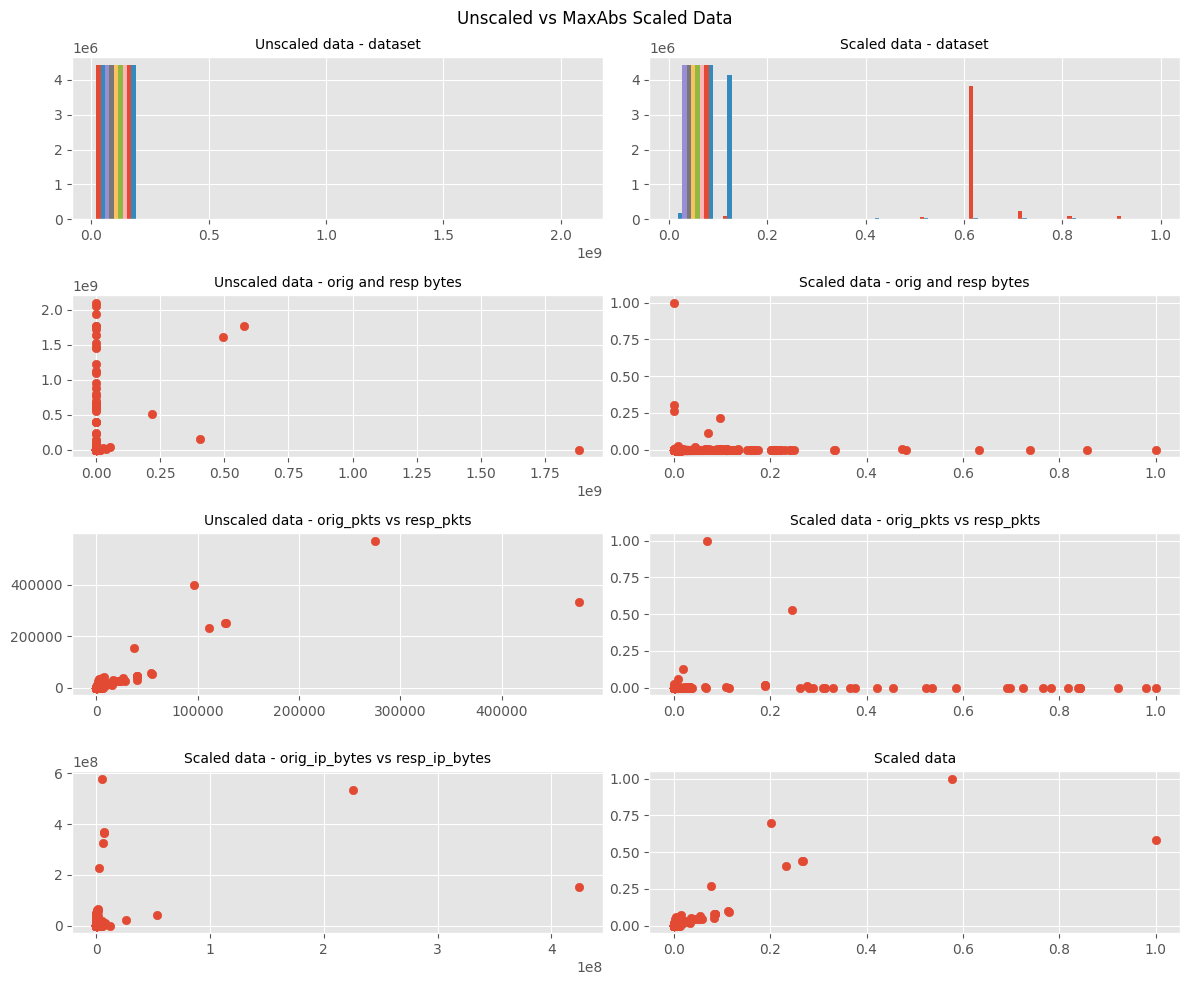

In [50]:
# Plotting the MaxAbs scaled data
plot_unscaled_vs_scaled(unscaled_data=df_conn, scaled_data=df_conn_max_abs_scaled, \
                        title='Unscaled vs MaxAbs Scaled Data')

In [51]:
# Let's look at the final scaler at this time,
# Robust Scaler
df_conn_robust_scaled = RobustScaler().fit_transform(df_conn)
df_conn_robust_scaled

array([[   -3.8396, 49352.    ,     0.    , ...,     0.    ,     0.    ,
            0.    ],
       [   -3.8399, 39598.    ,     0.    , ...,     0.    ,     0.    ,
            0.    ],
       [   -3.8399, 39604.    ,     0.    , ...,     0.    ,     0.    ,
            0.    ],
       ...,
       [   -1.1243,     0.    ,     0.    , ...,     0.    ,     1.    ,
           40.    ],
       [   -1.1237,     0.    ,     0.    , ...,     0.    ,     1.    ,
           40.    ],
       [   -1.1214,     0.    ,     0.    , ...,     0.    ,     1.    ,
           40.    ]])

In [52]:
# Look at the statistics
# This time, rounding to 1
np.round(pd.DataFrame(df_conn_robust_scaled).describe(), 1)

,0,1,2,3,4,5,6,7,8
count,4430183.0,4430183.0,4430183.0,4.430183e+06,4.430183e+06,4430183.0,4430183.0,4430183.0,4430183.0
mean,0.2,592.3,0.8,9.537000e+02,1.400830e+04,1.8,324.1,2.4,3585.8
std,1.9,6153.5,41.9,9.896742e+05,3.261770e+06,292.8,230312.8,436.4,507029.5
min,-11.8,-9200.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
25%,-0.2,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
75%,0.8,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
max,7.0,55086.0,33306.4,1.882413e+09,2.098064e+09,476032.0,423975367.0,571383.0,578874775.0


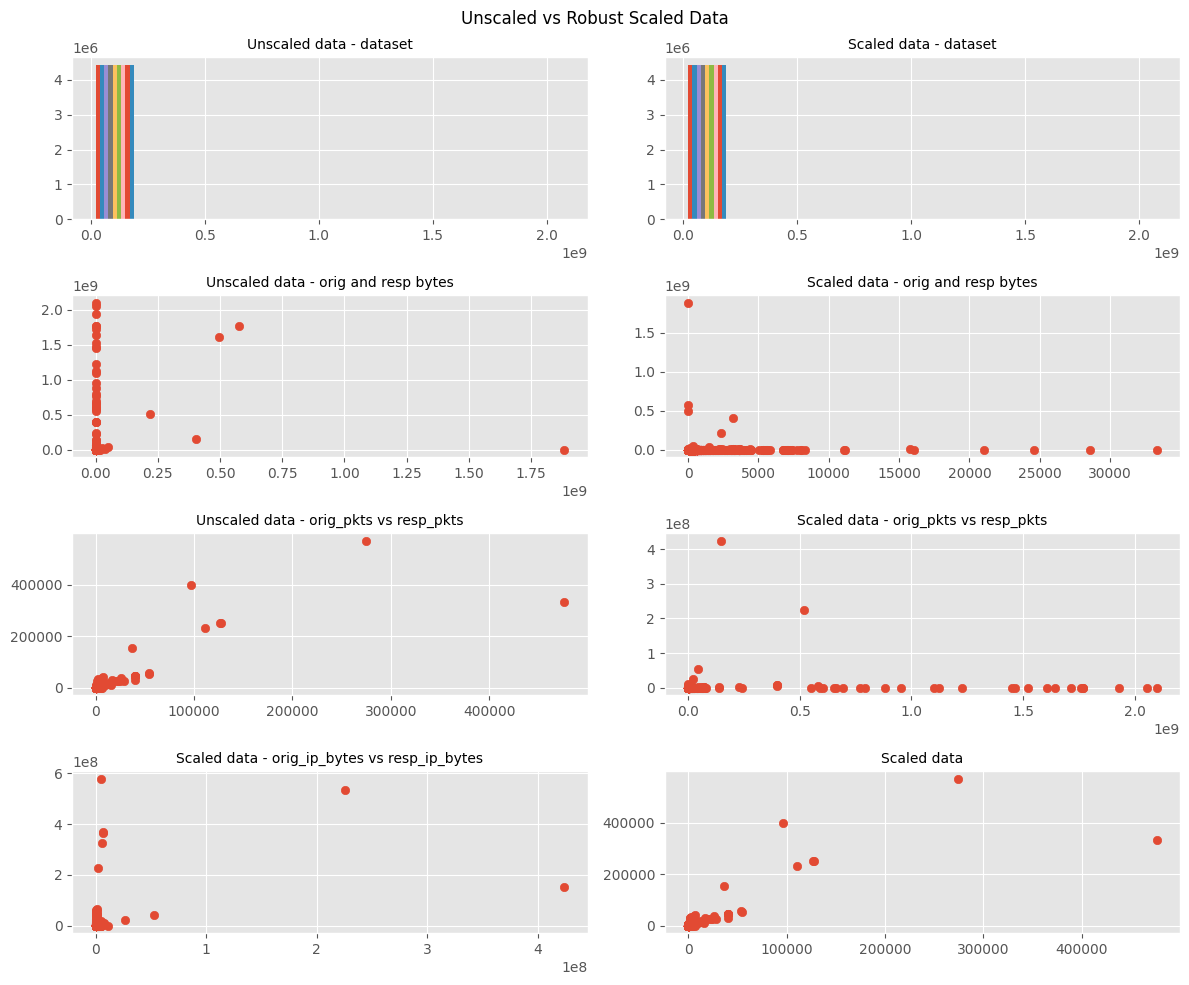

In [53]:
# Plotting the Robust scaled data
plot_unscaled_vs_scaled(unscaled_data=df_conn, scaled_data=df_conn_robust_scaled, \
                        title='Unscaled vs Robust Scaled Data')

In [54]:
# In this notebook, we took a looked at different scaling strategies
# That's it for this notebook!

Reference and other good reads: <br>
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html <br>
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler <br>
http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html <br>
https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/ <br>
https://machinelearningknowledge.ai/sklearn-feature-scaling-with-standardscaler-minmaxscaler-robustscaler-and-maxabsscaler/ <br>
https://medium.com/analytics-vidhya/feature-scaling-normalization-standardization-and-scaling-c920ed3637e7 <br>
https://scikit-learn.org/stable/modules/preprocessing.html <br>
https://sebastianraschka.com/Articles/2014_about_feature_scaling.html <br>
https://www.iana.org/assignments/service-names-port-numbers/service-names-port-numbers.xhtml <br>
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing. <br>